In [2]:
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
hul = yf.Ticker("HINDUNILVR.NS")
hul.info

{'zip': '400099',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 21000,
 'longBusinessSummary': 'Hindustan Unilever Limited, a consumer goods company that manufactures and sells home and personal care, food, and refreshment products in India and internationally. The company operates through Home Care, Beauty & Personal Care, Foods & Refreshment, and Others segments. The Home Care segment offers detergent bars and powders, detergent liquids, scourers, water business, purifiers business, etc. The Beauty & Personal Care segment provides oral, skin, and hair care products, as well as soaps, deodorants, talcum powder, color cosmetics, salon services, etc. The Foods & Refreshment segment provides culinary products, such as tomato based products, fruit based products, soups, etc., as well as tea, coffee, health food drinks, ice-creams, and frozen desserts. The Others segment engages in export and consignment sales activities. The company also engages in the beauty salons, job work, di

In [4]:
print(f"Market Cap : {hul.info['marketCap']}\n")
print(f"Employees : {hul.info['fullTimeEmployees']}\n")
print(f"Business Summary : \n{hul.info['longBusinessSummary']}")

Market Cap : 6117522931712

Employees : 21000

Business Summary : 
Hindustan Unilever Limited, a consumer goods company that manufactures and sells home and personal care, food, and refreshment products in India and internationally. The company operates through Home Care, Beauty & Personal Care, Foods & Refreshment, and Others segments. The Home Care segment offers detergent bars and powders, detergent liquids, scourers, water business, purifiers business, etc. The Beauty & Personal Care segment provides oral, skin, and hair care products, as well as soaps, deodorants, talcum powder, color cosmetics, salon services, etc. The Foods & Refreshment segment provides culinary products, such as tomato based products, fruit based products, soups, etc., as well as tea, coffee, health food drinks, ice-creams, and frozen desserts. The Others segment engages in export and consignment sales activities. The company also engages in the beauty salons, job work, discharge trust, and real estate busines

In [5]:
hul.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-26,2599.899902,2614.699951,2562.000000,2571.550049,1048791,0,0
2022-08-29,2550.000000,2607.899902,2550.000000,2575.800049,1450034,0,0
2022-08-30,2588.699951,2667.000000,2585.600098,2659.850098,2227943,0,0
2022-09-01,2650.000000,2655.000000,2594.000000,2606.000000,1702269,0,0
2022-09-02,2615.000000,2623.000000,2585.000000,2603.600098,937600,0,0


In [6]:
tsla.history(period='5d', actions=False)

NameError: name 'tsla' is not defined

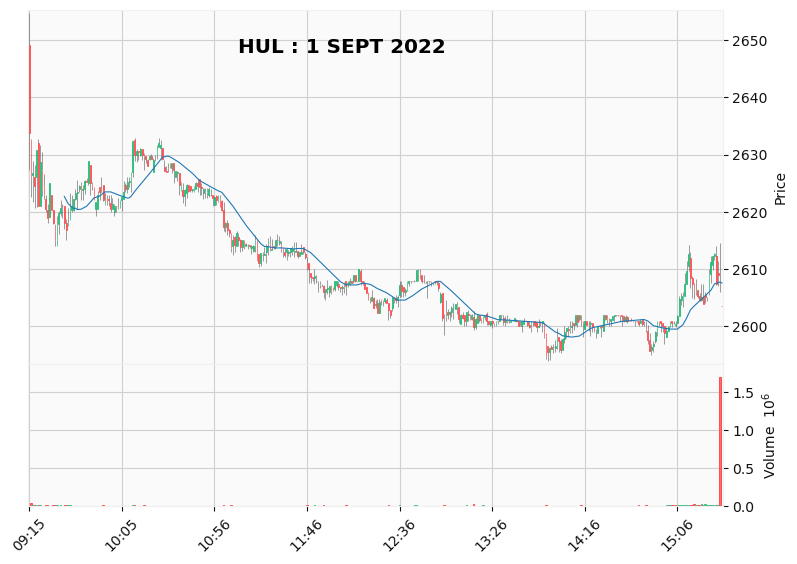

In [7]:
hist=hul.history(start='2022-09-01', end='2022-09-02', 
                  interval='1m', actions=False)



mpf.plot(hist, type='candle', volume=True, style='yahoo', mav=(20),
        title='HUL : 1 SEPT 2022', tight_layout=True)

In [8]:
data = yf.download("HINDUNILVR.NS TCS.BO INFY.BO", start='2022-09-01', end='2022-09-02', 
                  interval='1m',
        group_by='ticker', actions=False)
tcs=data["TCS.BO"]
infy=data["INFY.BO"]

[*********************100%***********************]  3 of 3 completed


In [9]:
tcs.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-09-01 09:15:00+05:30,3184.899902,3185.000000,3140.649902,3140.800049,3140.800049,5019.0
2022-09-01 09:16:00+05:30,3140.000000,3146.300049,3135.000000,3143.949951,3143.949951,2839.0
2022-09-01 09:17:00+05:30,3143.649902,3144.000000,3133.000000,3136.600098,3136.600098,2823.0
2022-09-01 09:18:00+05:30,3135.800049,3142.199951,3132.399902,3140.500000,3140.500000,1592.0
2022-09-01 09:19:00+05:30,3139.050049,3147.000000,3133.449951,3145.000000,3145.000000,1103.0


In [10]:
print(type(data["TCS.BO"]))

<class 'pandas.core.frame.DataFrame'>


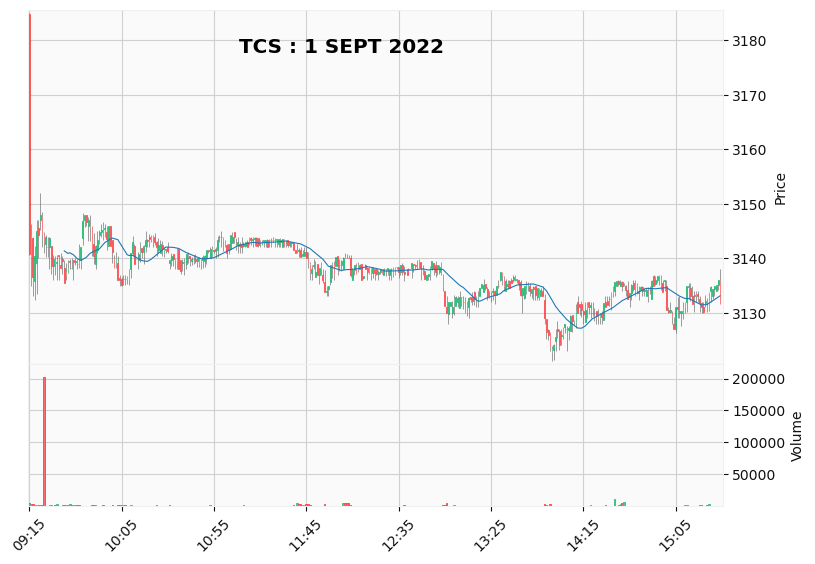

In [13]:
mpf.plot(tcs, type='candle', volume=True, style='yahoo', mav=(20),
        title='TCS : 1 SEPT 2022', tight_layout=True)

In [32]:
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd

data =yf.download("ACC.NS", period="1d",interval="5m")
data=data.reset_index(drop=True)

data['tr0'] = abs(data["High"] - data["Low"])
data['tr1'] = abs(data["High"] - data["Close"].shift(1))
data['tr2'] = abs(data["Low"]- data["Close"].shift(1))
data["TR"] = round(data[['tr0', 'tr1', 'tr2']].max(axis=1),2)
data["ATR"]=0.00
data['BUB']=0.00
data["BLB"]=0.00
data["FUB"]=0.00
data["FLB"]=0.00
data["ST"]=0.00

# Calculating ATR 
for i, row in data.iterrows():
    if i == 0:
        data.loc[i,'ATR'] = 0.00#data['ATR'].iat[0]
    else:
        data.loc[i,'ATR'] = ((data.loc[i-1,'ATR'] * 13)+data.loc[i,'TR'])/14

data['BUB'] = round(((data["High"] + data["Low"]) / 2) + (2 * data["ATR"]),2)
data['BLB'] = round(((data["High"] + data["Low"]) / 2) - (2 * data["ATR"]),2)


# FINAL UPPERBAND = IF( (Current BASICUPPERBAND < Previous FINAL UPPERBAND) or (Previous Close > Previous FINAL UPPERBAND))
#                     THEN (Current BASIC UPPERBAND) ELSE Previous FINALUPPERBAND)


for i, row in data.iterrows():
    if i==0:
        data.loc[i,"FUB"]=0.00
    else:
        if (data.loc[i,"BUB"]<data.loc[i-1,"FUB"])|(data.loc[i-1,"Close"]>data.loc[i-1,"FUB"]):
            data.loc[i,"FUB"]=data.loc[i,"BUB"]
        else:
            data.loc[i,"FUB"]=data.loc[i-1,"FUB"]

# FINAL LOWERBAND = IF( (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) or (Previous Close < Previous FINAL LOWERBAND)) 
#                     THEN (Current BASIC LOWERBAND) ELSE Previous FINAL LOWERBAND)

for i, row in data.iterrows():
    if i==0:
        data.loc[i,"FLB"]=0.00
    else:
        if (data.loc[i,"BLB"]>data.loc[i-1,"FLB"])|(data.loc[i-1,"Close"]<data.loc[i-1,"FLB"]):
            data.loc[i,"FLB"]=data.loc[i,"BLB"]
        else:
            data.loc[i,"FLB"]=data.loc[i-1,"FLB"]



# SUPERTREND = IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close <= Current FINAL UPPERBAND)) THEN
#                 Current FINAL UPPERBAND
#             ELSE
#                 IF((Previous SUPERTREND = Previous FINAL UPPERBAND) and (Current Close > Current FINAL UPPERBAND)) THEN
#                     Current FINAL LOWERBAND
#                 ELSE
#                     IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close >= Current FINAL LOWERBAND)) THEN
#                         Current FINAL LOWERBAND
#                     ELSE
#                         IF((Previous SUPERTREND = Previous FINAL LOWERBAND) and (Current Close < Current FINAL LOWERBAND)) THEN
#                             Current FINAL UPPERBAND


for i, row in data.iterrows():
    if i==0:
        data.loc[i,"ST"]=0.00
    elif (data.loc[i-1,"ST"]==data.loc[i-1,"FUB"]) & (data.loc[i,"Close"]<=data.loc[i,"FUB"]):
        data.loc[i,"ST"]=data.loc[i,"FUB"]
    elif (data.loc[i-1,"ST"]==data.loc[i-1,"FUB"])&(data.loc[i,"Close"]>data.loc[i,"FUB"]):
        data.loc[i,"ST"]=data.loc[i,"FLB"]
    elif (data.loc[i-1,"ST"]==data.loc[i-1,"FLB"])&(data.loc[i,"Close"]>=data.loc[i,"FLB"]):
        data.loc[i,"ST"]=data.loc[i,"FLB"]
    elif (data.loc[i-1,"ST"]==data.loc[i-1,"FLB"])&(data.loc[i,"Close"]<data.loc[i,"FLB"]):
        data.loc[i,"ST"]=data.loc[i,"FUB"]

# Buy Sell Indicator
for i, row in data.iterrows():
    if i==0:
        data["ST_BUY_SELL"]="NA"
    elif (data.loc[i,"ST"]<data.loc[i,"Close"]) :
        data.loc[i,"ST_BUY_SELL"]="BUY"
    else:
        data.loc[i,"ST_BUY_SELL"]="SELL"

[*********************100%***********************]  1 of 1 completed
